In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

import datetime, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from utils import *
from model import *
from ext import *
from plotting import *

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
X, y = feats_load()
X_train, X_test, y_train, y_test =\
        train_test_split(X, y, train_size=0.8, random_state=1)
X_train, X_test = z_score_normalization(X_train, X_test)

d:\anaconda\envs\py36-6201\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
from sklearn import metrics
classes = np.unique(y)
y_train_1h = one_hot_encoder(y_train)
y_test_1h = one_hot_encoder(y_test)
num_classes = classes.shape[0]
model = DNN(X, num_classes, keep_prob=0.5)
history = model.fit(X_train, y_train_1h, validation_data=(X_test, y_test_1h),\
                 epochs=200, batch_size=32, verbose=0)
predict = model.predict(X_test)
predict_ = []
for p in predict:
    curr = (p == max(p))
    idx = np.where(curr)[0][0]
    predict_.append(classes[idx])
cm = metrics.confusion_matrix(y_test, predict_)
print("Testing Accuracy: {:.2%}\n".format(metrics.accuracy_score(y_test, predict_)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 160)               25760     
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 160)               25760     
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                12880     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                3240      
__________

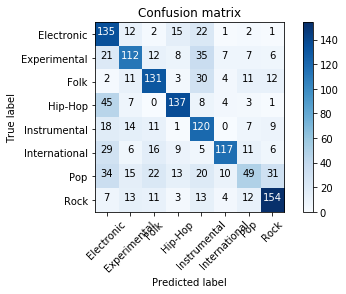

In [4]:
plot_confusion_matrix(cm, classes)

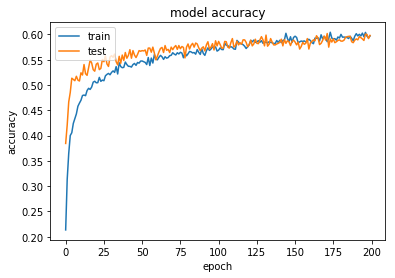

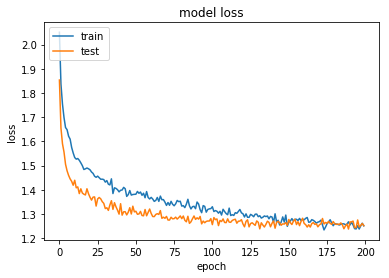

In [5]:
plot_keras_history(history)

In [6]:
scores = []
for train_idx, test_idx in cross_validation(X, y):
    cvX_train, cvX_test = X[train_idx], X[test_idx]
    cvy_train, cvy_test = y[train_idx], y[test_idx]
    cvX_train, cvX_test = z_score_normalization(cvX_train, cvX_test)
    model = DNN(X, num_classes, keep_prob=0.5, summary=False)
    cvy_train_1h = one_hot_encoder(cvy_train)
    cvy_test_1h = one_hot_encoder(cvy_test)
    history = model.fit(cvX_train, cvy_train_1h, validation_data=(cvX_test, cvy_test_1h),\
                 epochs=200, batch_size=32, verbose=0)
    predict = model.predict(cvX_test)
    predict_ = []
    for p in predict:
        curr = (p == max(p))
        idx = np.where(curr)[0][0]
        predict_.append(classes[idx])
    scores.append(get_metrics(cvy_test, predict_))
scores = np.array(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores[:,0].mean(), scores[:,0].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores[:,1].mean(), scores[:,1].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores[:,2].mean(), scores[:,2].std() * 2))
print("F1-Measure: %0.2f (+/- %0.2f)" % (scores[:,3].mean(), scores[:,3].std() * 2))

Accuracy: 0.57 (+/- 0.06)
Recall: 0.57 (+/- 0.06)
Precision: 0.57 (+/- 0.06)
F1-Measure: 0.56 (+/- 0.06)
